### IMPORTING AND INSTALLING THE DEPENDENCIES AND THE DATASET

In [20]:

# Downloaded MUSDB18 dataset from https://sigsep.github.io/datasets/musdb.html#musdb18-compressed-stems (you will be redirected to zenodo)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Checking the files in the dataset
import os
for dirname, _, filenames in os.walk('C:/Users/DELL/MUSDB18/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/DELL/MUSDB18/MUSDB18-7\test\Al James - Schoolboy Facination.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\AM Contra - Heart Peripheral.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Angels In Amplifiers - I'm Alright.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Arise - Run Run Run.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Ben Carrigan - We'll Talk About It All Tonight.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\BKS - Bulldozer.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\BKS - Too Much.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Bobby Nobody - Stitch Up.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Buitraker - Revo X.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Carlos Gonzalez - A Place For Us.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Cristina Vane - So Easy.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Detsky Sad - Walkie Talkie.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Enda Reilly - Cur An Long Ag Seol.stem.mp4
C:/Users/DELL/MUSDB18/MUSDB18-7\test\Forkupine

In [2]:
# A python package to parse and process the MUSDB18 dataset
# musdb comes with 7 seconds excerpts (automatically downloaded) of the full dataset for quick evaluation or prototyping. The full dataset, 
#however, needs to be downloaded via Zenodo and stored (unzipped) separately.

pip install musdb

  Obtaining dependency information for musdb from https://files.pythonhosted.org/packages/ae/31/23c23568e6ecbbabcde19dde1df9a1ad8951591ec9d4f5bbf2906732a2b7/musdb-0.4.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for stempeg>=0.2.3 from https://files.pythonhosted.org/packages/8d/e5/84adc8506b61ca9f205d9dcc5558b6b5b1fa477c45616f553a0ca1b8020d/stempeg-0.2.3-py3-none-any.whl.metadata
  Obtaining dependency information for pyaml from https://files.pythonhosted.org/packages/70/d9/6fdc01cee01fe56fddfd46892d9846ebb53a5f8eb78056955c516eef42c5/pyaml-24.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/18/eb/fdb7eb9e48b7b02554e1664afd3bd3f117f6b6d6c5881438a0b055554f9b/tqdm-4.66.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for ffmpeg-python>


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import musdb
mus = musdb.DB(download=True)
mus[0].audio

100%|███████████████████████████████████████████████████████████████████████████████| 140M/140M [00:31<00:00, 4.72MB/s]


array([[-8.84704590e-02, -3.79333496e-02],
       [-1.07421875e-01, -5.22460938e-02],
       [-8.42590332e-02, -5.48400879e-02],
       ...,
       [-8.23974609e-04,  3.05175781e-05],
       [-8.54492188e-04,  7.01904297e-04],
       [-8.54492188e-04,  1.31225586e-03]])

In [8]:
print(len(mus))

mus_train = musdb.DB(root="C:/Users/DELL/MUSDB18/MUSDB18-7/",subsets="train")
print(len(mus_train))

144
94


### BREAKING THE AUDIO INTO CHUNKS OF 64 TIME STAMPS TO CREATE THE TRAIN SET (USED THE LEFT CHANNEL AUDIO)

In [19]:
import pandas as pd

# create empty lists to store the data
x_list = []
y_list = []

# loop over each song in musdb
counter = 1 
for song in mus_train:
    print(counter)
    # get the left audio and drums data
    audio_data = song.targets['accompaniment'].audio.T[0]
    drums_data = song.targets['drums'].audio.T[0]
    
    # split the audio and drums data into 64-sample chunks
    audio_chunks = [audio_data[i:i+64] for i in range(0, len(audio_data),64)]#64
    drums_chunks = [drums_data[i:i+64] for i in range(0, len(drums_data),64)]

    # print(audio_chunks)
    # print(drums_chunks)
    # add the chunks to the x_list and y_list
    x_list.extend(audio_chunks)
    y_list.extend(drums_chunks)
    #
    
    if(counter==2) :
        break
    
    counter = counter+1    
        
# create the DataFrame with x and y as columns
df_train = pd.DataFrame({'x': x_list, 'y': y_list})

print(df_train.head())
print(df_train.shape)

1
2
                                                   x  \
0  [-0.047332763671875, -0.057586669921875, -0.04...   
1  [-0.128082275390625, -0.1279296875, -0.1371154...   
2  [-0.048095703125, -0.040679931640625, -0.03601...   
3  [0.09625244140625, 0.094635009765625, 0.092529...   
4  [0.098846435546875, 0.07940673828125, 0.062072...   

                                                   y  
0  [0.003326416015625, 0.00360107421875, 0.000885...  
1  [0.000244140625, 0.0003662109375, -0.000640869...  
2  [-0.001953125, -0.000946044921875, -0.00045776...  
3  [0.001983642578125, 0.001617431640625, 0.00167...  
4  [-0.000518798828125, 0.0008544921875, 0.001190...  
(9376, 2)


### BREAKING THE AUDIO INTO CHUNKS OF 64 TIME STAMPS TO CREATE THE VAL SET (USED THE RIGHT CHANNEL AUDIO)

In [10]:
import pandas as pd

# create empty lists to store the data
x_list = []
y_list = []

# loop over each song in musdb
counter = 1 
for song in mus_train:
    print(counter)
    # get the right audio and drums data
    audio_data = song.targets['accompaniment'].audio.T[1]
    drums_data = song.targets['drums'].audio.T[1]
    
    # split the audio and drums data into 64-sample chunks
    audio_chunks = [audio_data[i:i+64] for i in range(0, len(audio_data),64)]#64
    drums_chunks = [drums_data[i:i+64] for i in range(0, len(drums_data),64)]

    # print(audio_chunks)
    # print(drums_chunks)
    # add the chunks to the x_list and y_list
    x_list.extend(audio_chunks)
    y_list.extend(drums_chunks)
    #
    if(counter==2) :
        break
    counter = counter+1
        
# create the DataFrame with x and y as columns
df_test = pd.DataFrame({'x': x_list, 'y': y_list})

print(df_test.head())
print(df_test.shape)

1
2
                                                   x  \
0  [-0.037933349609375, -0.0521240234375, -0.0542...   
1  [-0.122772216796875, -0.129302978515625, -0.12...   
2  [-0.11602783203125, -0.12713623046875, -0.1370...   
3  [0.104461669921875, 0.09356689453125, 0.090942...   
4  [-0.003265380859375, 0.017364501953125, 0.0440...   

                                                   y  
0  [0.003631591796875, 0.00384521484375, 0.001190...  
1  [0.00164794921875, 0.00140380859375, 0.0005493...  
2  [-0.002532958984375, -0.00128173828125, -0.000...  
3  [0.001953125, 0.001220703125, 0.00140380859375...  
4  [0.000823974609375, 0.001434326171875, 0.00146...  
(9376, 2)


### CONSTRUCTING THE UNET MODEL

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Concatenate
kernel_size = 5
strides = 1


input_layer = tf.keras.layers.Input(shape=(None,64))

conv1 = tf.keras.layers.Conv1D(filters=16, kernel_size=kernel_size, strides=strides, padding='same')(input_layer)
batch1 = tf.keras.layers.BatchNormalization()(conv1)
activ1 = tf.keras.layers.LeakyReLU(alpha=0.2)(batch1)

conv2 = tf.keras.layers.Conv1D(filters=32, kernel_size=kernel_size, strides=strides, padding='same')(activ1)
batch2 = tf.keras.layers.BatchNormalization()(conv2)
activ2 = tf.keras.layers.LeakyReLU(alpha=0.2)(batch2)

conv3 = tf.keras.layers.Conv1D(filters=64, kernel_size=kernel_size, strides=strides, padding='same')(activ2)
batch3 = tf.keras.layers.BatchNormalization()(conv3)
activ3 = tf.keras.layers.LeakyReLU(alpha=0.2)(batch3)

conv4 = tf.keras.layers.Conv1D(filters=128, kernel_size=kernel_size, strides=strides, padding='same')(activ3)
batch4 = tf.keras.layers.BatchNormalization()(conv4)
activ4 = tf.keras.layers.LeakyReLU(alpha=0.2)(batch4)

conv5 = tf.keras.layers.Conv1D(filters=256, kernel_size=kernel_size, strides=strides, padding='same')(activ4)
batch5 = tf.keras.layers.BatchNormalization()(conv5)
activ5 = tf.keras.layers.LeakyReLU(alpha=0.2)(batch5)

conv6 = tf.keras.layers.Conv1D(filters=512, kernel_size=kernel_size, strides=strides, padding='same')(activ5)
batch6 = tf.keras.layers.BatchNormalization()(conv6)
activ6 = tf.keras.layers.LeakyReLU(alpha=0.2)(batch6)

up5 = tf.keras.layers.Conv1DTranspose(filters=256, kernel_size=kernel_size, strides=strides, padding='same')(activ6)
conc5 = tf.keras.layers.Concatenate()([up5, activ5])
uactiv5 = tf.keras.layers.ReLU()(conc5)
drop1 = tf.keras.layers.Dropout(0.5)(uactiv5)

up4 = tf.keras.layers.Conv1DTranspose(filters=128, kernel_size=kernel_size, strides=strides, padding='same')(drop1)
conc4 = tf.keras.layers.Concatenate()([up4, activ4])
uactiv4 = tf.keras.layers.ReLU()(conc4)
conc4 = tf.keras.layers.Dropout(0.5)(uactiv4)

up3 = tf.keras.layers.Conv1DTranspose(filters=64, kernel_size=kernel_size, strides=strides, padding='same')(conc4)
conc3 = tf.keras.layers.Concatenate()([up3, activ3])
uactiv3 = tf.keras.layers.ReLU()(conc3)
drop3 = tf.keras.layers.Dropout(0.5)(uactiv3)

up2 = tf.keras.layers.Conv1DTranspose(filters=32, kernel_size=kernel_size, strides=strides, padding='same')(drop3)
conc2 = tf.keras.layers.Concatenate()([up2, activ2])
uactiv2 = tf.keras.layers.ReLU()(conc2)

up1 = tf.keras.layers.Conv1DTranspose(filters=16, kernel_size=kernel_size, strides=strides, padding='same')(uactiv2)
conc1 = tf.keras.layers.Concatenate()([up1, activ1])
uactiv1 = tf.keras.layers.ReLU()(conc1)

mask = tf.keras.layers.Conv1DTranspose(filters=1, kernel_size=kernel_size, strides=strides, padding='same')(uactiv1)
output_layer = tf.keras.layers.Multiply()([input_layer, mask])

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 64)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, None, 16)             5136      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, 16)             64        ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, None, 16)             0         ['batch_normalization[0][0

### TRAINING THE MODEL

In [12]:
from tqdm.keras import TqdmCallback
model.compile(
    loss=['mae'],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
)
x_train = tf.expand_dims((tf.constant(df_train['x'].apply(lambda x: list(x)).tolist())),0)
y_train = tf.expand_dims((tf.constant(df_train['y'].tolist())),0)
x_val = tf.expand_dims(tf.constant(df_test['x'].apply(lambda x: list(x)).tolist()),0)
y_val = tf.expand_dims(tf.constant(df_test['y'].tolist()),0)

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val), verbose=2, callbacks=[TqdmCallback(verbose=2)])

0epoch [00:00, ?epoch/s]

  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 1/40
1/1 - 4s - loss: 0.0939 - val_loss: 0.0273 - 4s/epoch - 4s/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 2/40
1/1 - 1s - loss: 0.0727 - val_loss: 0.0274 - 717ms/epoch - 717ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 3/40
1/1 - 1s - loss: 0.0568 - val_loss: 0.0268 - 690ms/epoch - 690ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 4/40
1/1 - 1s - loss: 0.0488 - val_loss: 0.0265 - 736ms/epoch - 736ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 5/40
1/1 - 1s - loss: 0.0465 - val_loss: 0.0263 - 712ms/epoch - 712ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 6/40
1/1 - 1s - loss: 0.0424 - val_loss: 0.0261 - 744ms/epoch - 744ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 7/40
1/1 - 1s - loss: 0.0401 - val_loss: 0.0261 - 721ms/epoch - 721ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 8/40
1/1 - 1s - loss: 0.0381 - val_loss: 0.0259 - 731ms/epoch - 731ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 9/40
1/1 - 1s - loss: 0.0368 - val_loss: 0.0258 - 720ms/epoch - 720ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 10/40
1/1 - 1s - loss: 0.0355 - val_loss: 0.0257 - 713ms/epoch - 713ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 11/40
1/1 - 1s - loss: 0.0342 - val_loss: 0.0257 - 712ms/epoch - 712ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 12/40
1/1 - 1s - loss: 0.0331 - val_loss: 0.0257 - 723ms/epoch - 723ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 13/40
1/1 - 1s - loss: 0.0321 - val_loss: 0.0258 - 737ms/epoch - 737ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 14/40
1/1 - 1s - loss: 0.0314 - val_loss: 0.0257 - 737ms/epoch - 737ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 15/40
1/1 - 1s - loss: 0.0310 - val_loss: 0.0255 - 727ms/epoch - 727ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 16/40
1/1 - 1s - loss: 0.0300 - val_loss: 0.0254 - 772ms/epoch - 772ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 17/40
1/1 - 1s - loss: 0.0297 - val_loss: 0.0253 - 750ms/epoch - 750ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 18/40
1/1 - 1s - loss: 0.0291 - val_loss: 0.0253 - 696ms/epoch - 696ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 19/40
1/1 - 1s - loss: 0.0287 - val_loss: 0.0254 - 733ms/epoch - 733ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 20/40
1/1 - 1s - loss: 0.0281 - val_loss: 0.0254 - 757ms/epoch - 757ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 21/40
1/1 - 1s - loss: 0.0279 - val_loss: 0.0253 - 766ms/epoch - 766ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 22/40
1/1 - 1s - loss: 0.0276 - val_loss: 0.0252 - 706ms/epoch - 706ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 23/40
1/1 - 1s - loss: 0.0270 - val_loss: 0.0251 - 723ms/epoch - 723ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 24/40
1/1 - 1s - loss: 0.0267 - val_loss: 0.0250 - 720ms/epoch - 720ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 25/40
1/1 - 1s - loss: 0.0263 - val_loss: 0.0250 - 750ms/epoch - 750ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 26/40
1/1 - 1s - loss: 0.0260 - val_loss: 0.0250 - 737ms/epoch - 737ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 27/40
1/1 - 1s - loss: 0.0259 - val_loss: 0.0249 - 720ms/epoch - 720ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 28/40
1/1 - 1s - loss: 0.0255 - val_loss: 0.0248 - 774ms/epoch - 774ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 29/40
1/1 - 1s - loss: 0.0252 - val_loss: 0.0248 - 809ms/epoch - 809ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 30/40
1/1 - 1s - loss: 0.0251 - val_loss: 0.0248 - 715ms/epoch - 715ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 31/40
1/1 - 1s - loss: 0.0248 - val_loss: 0.0248 - 718ms/epoch - 718ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 32/40
1/1 - 1s - loss: 0.0246 - val_loss: 0.0248 - 760ms/epoch - 760ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 33/40
1/1 - 1s - loss: 0.0244 - val_loss: 0.0247 - 716ms/epoch - 716ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 34/40
1/1 - 1s - loss: 0.0243 - val_loss: 0.0246 - 718ms/epoch - 718ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 35/40
1/1 - 1s - loss: 0.0241 - val_loss: 0.0245 - 760ms/epoch - 760ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 36/40
1/1 - 1s - loss: 0.0239 - val_loss: 0.0245 - 744ms/epoch - 744ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 37/40
1/1 - 1s - loss: 0.0239 - val_loss: 0.0244 - 805ms/epoch - 805ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 38/40
1/1 - 1s - loss: 0.0237 - val_loss: 0.0244 - 759ms/epoch - 759ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 39/40
1/1 - 1s - loss: 0.0235 - val_loss: 0.0244 - 763ms/epoch - 763ms/step


  0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Epoch 40/40
1/1 - 1s - loss: 0.0235 - val_loss: 0.0244 - 824ms/epoch - 824ms/step


### SAVING THE MODEL

In [13]:
model.save(f'models/unet.h5')
model.save_weights('model_weights.h5')
print("Weights are saved")
model.load_weights('model_weights.h5')

C:\Users\DELL\anaconda3\envs\Thesis\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Weights are saved


### PLOTTING THE TRAIN LOSS AND VAL LOSS

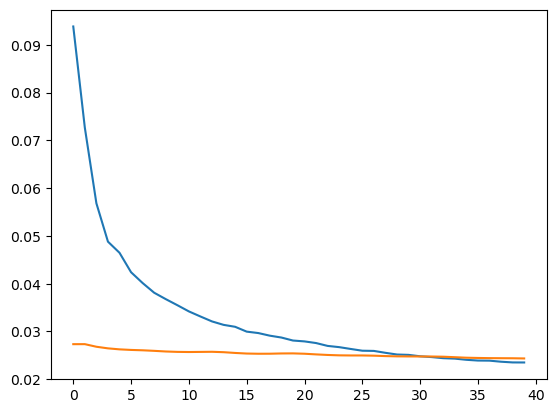

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### TESTING THE MODEL

In [16]:
mus_test = musdb.DB(root="C:/Users/DELL/MUSDB18/MUSDB18-7/",subsets="test")
print(len(mus_test))
mus_test[11].audio

50


array([[ 0.22113037,  0.24331665],
       [ 0.29064941,  0.31222534],
       [ 0.27276611,  0.27401733],
       ...,
       [-0.00112915,  0.0022583 ],
       [-0.00088501,  0.0017395 ],
       [-0.0005188 ,  0.00112915]])

### USING THE LEFT CHANNEL DATA FOR TESTING AND FINDING THE ACCURACY

In [17]:
id = 11

x_list1 = []
y_list1 = []

   
# get the left audio and drums data
audio_data = mus_test[id].targets['accompaniment'].audio.T[0]
drums_data = mus_test[id].targets['drums'].audio.T[0]
    
# split the audio and vocals data into 64-sample chunks
audio_chunks = [audio_data[i:i+64] for i in range(0, len(audio_data),64)]#64
drums_chunks = [drums_data[i:i+64] for i in range(0, len(drums_data),64)]

    
# add the chunks to the x_list and y_list
x_list1.extend(audio_chunks)
y_list1.extend(drums_chunks)

# create the DataFrame with x and y as columns
df_pred = pd.DataFrame({'x': x_list1, 'y': y_list1}) 
x_test = tf.expand_dims((tf.constant(df_pred['x'].apply(lambda x: list(x)).tolist())),0)
y_test = tf.expand_dims((tf.constant(df_pred['y'].tolist())),0)
y_pred = model.predict(x_test)


def calculate_snr(true_signal, predicted_signal):
    noise = true_signal - predicted_signal
    signal_power = np.sum(true_signal ** 2)
    noise_power = np.sum(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Calculate the SNR between the true and predicted signals
accuracy = calculate_snr(y_test, y_pred)

print("Accuracy (SNR):", abs(accuracy))
df_pred

1/1 [==============================] - 1s 529ms/step
Accuracy (SNR): 0.31130051379253165


,x,y
0,"[0.216094970703125, 0.285003662109375, 0.26333...","[0.183319091796875, 0.23199462890625, 0.200744..."
1,"[0.009307861328125, 0.01348876953125, 0.030364...","[0.144287109375, 0.138580322265625, 0.13656616..."
2,"[-0.216033935546875, -0.2142333984375, -0.2074...","[-0.173309326171875, -0.178436279296875, -0.18..."
3,"[-0.317840576171875, -0.323699951171875, -0.33...","[-0.341033935546875, -0.34063720703125, -0.341..."
4,"[-0.257537841796875, -0.26165771484375, -0.260...","[-0.15679931640625, -0.152008056640625, -0.147..."
...,...,...
4683,"[0.009765625, 0.01513671875, -0.01956176757812...","[0.05657958984375, 0.059967041015625, 0.024688..."
4684,"[0.133544921875, 0.12249755859375, 0.115447998...","[0.09454345703125, 0.0794677734375, 0.06958007..."
4685,"[-0.052978515625, -0.095062255859375, -0.10397...","[-0.05810546875, -0.113616943359375, -0.137298..."
4686,"[0.007110595703125, 0.00189208984375, -0.00314...","[0.00567626953125, 0.00128173828125, -0.003967..."


### FINAL DRUM SEPARATED OUTPUT

In [18]:
from IPython.display import Audio

# Assuming you have the arrays y_test and y_pred containing the audio data
y_pred1 = y_pred.flatten()
# Play the true signal (y_test)
numpy_array = y_test.numpy()

# Convert the NumPy array to a 1D array
numpy_1d_array = numpy_array.flatten()
# Audio(numpy_1d_array, rate=44100)

# Play the predicted signal (y_pred)
Audio(y_pred1, rate=44100)